In [7]:
import numpy as np

In [8]:
data=[]
label=[]
with open('data0.txt','r') as f:
    for row in f:
        rowlist=row.strip().split(' ')
        if(len(rowlist)>1):
            data.append([int(rowlist[0]),int(rowlist[1])])
            label.append(int(rowlist[2]))

In [9]:
w=[[0,0],[0,0],[0,0],[0,0]]
b=[0,0,0,0]

In [10]:
def getPred(x):
    res=[]
    for i in [0,1,2,3]:
        res.append(np.dot(w[i],x)+b[i])
    return np.argmax(res)

In [11]:
from sklearn.utils import shuffle

In [12]:
data,label=shuffle(data,label)
convergence=False
while(convergence!=True):
    convergence=True
    for row,y in zip(data,label):
        pred=getPred(row)
        if(pred!=y):
            convergence=False
            w[pred][0]-=row[0]
            w[pred][1]-=row[1]
            b[pred]-=1

            w[y][0]+=row[0]
            w[y][1]+=row[1]
            b[y]+=1

        

In [39]:
w

[[0, -3], [-36, 34], [24, -34], [12, 3]]

In [40]:
b

[61, -16, -15, -30]

In [32]:
clrDict={'cl0':[],'cl1':[],'cl2':[],'cl3':[]}        

for x in range(0,360):
    for y in range(0,240):
        clrDict['cl'+str(getPred([x/20,y/20]))].append((x/20,y/20))
        

In [33]:
from matplotlib import pyplot as plt

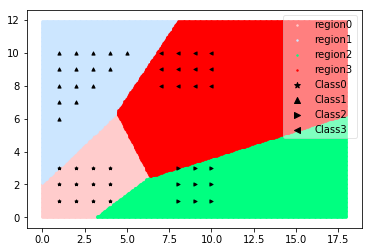

In [38]:
plt.scatter([y[0] for y in clrDict['cl0']],[x[1] for x in clrDict['cl0']],c=(1,0.8,0.8),s=2,label='region0')
plt.scatter([y[0] for y in clrDict['cl1']],[x[1] for x in clrDict['cl1']],c=(0.8,0.9,1),s=2,label='region1')
plt.scatter([y[0] for y in clrDict['cl2']],[x[1] for x in clrDict['cl2']],c=(0,1,0.5),s=2,label='region2')
plt.scatter([y[0] for y in clrDict['cl3']],[x[1] for x in clrDict['cl3']],c='red',s=2,label='region3')
for row,y in zip(data,label):
    if(y==0):
        plt.scatter(row[0],row[1],marker="*",s=10,c='black')
    if(y==1):
        plt.scatter(row[0],row[1],marker="^",s=10,c='black')
    if(y==2):
        plt.scatter(row[0],row[1],marker=">",s=10,c='black')
    if(y==3):
        plt.scatter(row[0],row[1],marker="<",s=10,c='black')
plt.scatter([],[],marker="*",label='Class0',c='black')
plt.scatter([],[],marker="^",label='Class1',c='black')
plt.scatter([],[],marker=">",label='Class2',c='black')
plt.scatter([],[],marker="<",label='Class3',c='black')

leg = plt.legend(fancybox=True, loc=1)
# set the alpha value of the legend: it will be translucent
leg.get_frame().set_alpha(0.5)

#plt.legend(loc=4,fancybox=True)
plt.show()